In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename = '/content/drive/My Drive/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [7]:
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [8]:
print('Hay', df.duplicated().sum(), 'duplicados.')

Hay 0 duplicados.


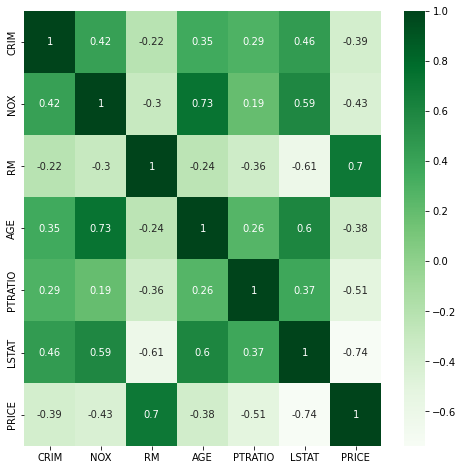

In [9]:
#1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio.

corr = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio.

-RM, PTRATIO, LSTAT

In [10]:
#Limitaremos nuestros análisis de estas tres características.

X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['PRICE']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
#Instancien el modelo y ajústenlo al conjunto de entrenamiento.
scaler = StandardScaler()
# Instanciar la regresión
lin_reg = LinearRegression()
# Crear el pipeline
reg_pipe = make_pipeline(scaler, lin_reg)
# Hacer el fit que corresponda
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluar el modelo de rendimiento en el conjunto de entrenamiento
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

# usando la puntuación R^2. 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Evalúen el modelo usando el error absoluto medio (EAM).
X_train_MAE = mean_absolute_error(y_train, train_pred)
X_test_MAE = mean_absolute_error(y_test, test_pred)

# 7) Evalúen el modelo usando el error cuadrático medio (ECM).  
X_train_MSE = mean_squared_error(y_train, train_pred)
X_test_MSE = mean_squared_error(y_test, test_pred)

In [17]:
print('El Coeficiente de determinación R2 en el training es ', round(train_r2, 2))
print('El Coeficiente de determinación R2 en el testing es', round(test_r2, 2))
print('El Error Absoluto Medio (MAE) en el training es', round(X_train_MAE, 2))
print('El Error Absoluto Medio (MAE) en el test set es', round(X_test_MAE, 2))
print('El Error Cuadrático Medio (MSE) en el training es', round(X_train_MSE, 2))
print('El Error Cuadrático Medio (MSE) en el testing es', round(X_test_MSE, 2))
print('La Raíz del Error Cuadrático Medio (RMSE) en el training es', round(np.sqrt(X_train_MSE), 2))
print('La Raíz del Error Cuadrático Medio (RMSE) en el testing es', round(np.sqrt(X_test_MSE), 2))

El Coeficiente de determinación R2 en el training es  0.69
El Coeficiente de determinación R2 en el testing es 0.63
El Error Absoluto Medio (MAE) en el training es 3.71
El Error Absoluto Medio (MAE) en el test set es 3.39
El Error Cuadrático Medio (MSE) en el training es 27.69
El Error Cuadrático Medio (MSE) en el testing es 25.69
La Raíz del Error Cuadrático Medio (RMSE) en el training es 5.26
La Raíz del Error Cuadrático Medio (RMSE) en el testing es 5.07


Los resultados nos dicen lo contrario de los estipulado en clase. Lo que debe estar cerca del cero se aleja y lo que debe estar lejos se acerca.

El R2 nos dice que en el test solamente hay una variación que ronda el 63%.
Lo que refleja el Coeficiente de determinación es que hay una franja grande de error  a la hora de calcular el precio de una casa en Boston.

El Error Cuadrático Medio (MSE) es tan grande que supera al Error Absoluto Medio (MAE) lo que sugiere que el error es enorme y no permite de ninguna manera una predicción, ni mucho menos una generalicación.
